In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('paper')
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = 14, 10

thesis_dir = '/home/sam/thesis/report/figures'

hue_order = ['NARTI', 'monocle', 'paga', 'slingshot']

In [9]:
fps = [
    '../result/result_other_methods.csv',
    '../result/result_narti.csv'
]

df = pd.concat([pd.read_csv(fp) for fp in fps])

topology_dict = {
    'aging': 'linear',
    'human_embryos': 'linear',
    'germline': 'bifurcating',
    'mesoderm': 'tree',
    'human_embryos': 'cyclic',
    'dentate': 'linear',
    'fibroblast': 'bifurcating',
    'planaria_muscle': 'bifurcating',
    'planaria_full': 'tree',
    'immune': 'disconnected',
    'linear_1': 'linear',
    'linear_2': 'linear',
    'linear_3': 'linear',
    'bifurcating_1': 'bifurcating',
    'bifurcating_2': 'bifurcating',
    'bifurcating_3': 'bifurcating',
    'trifurcating_1': 'multifurcating',
    'trifurcating_2': 'multifurcating',
    'cycle_1': 'cyclic',
    'cycle_2': 'cyclic',
    'cycle_3': 'cyclic',
    'linear': 'linear',
    'bifurcation': 'bifurcating',
    'tree': 'tree',
    'converging_1': 'tree'
}
df['topology'] = df['data'].map(topology_dict)


In [10]:
df.data.unique()

array(['aging', 'bifurcating_1', 'bifurcating_2', 'bifurcating_3',
       'bifurcation', 'cell_cycle', 'converging_1', 'cycle_1', 'cycle_2',
       'cycle_3', 'dentate', 'fibroblast', 'germline', 'human_embryos',
       'immune', 'linear', 'linear_1', 'linear_2', 'linear_3', 'mesoderm',
       'multifurcating', 'neonatal', 'planaria_full', 'planaria_muscle',
       'tree', 'trifurcating_1', 'trifurcating_2'], dtype=object)

In [11]:
tidy = df.melt(id_vars=['method', 'data', 'source', 'topology'], value_vars=['GED score', 'IM score', 'ARI', 'GRI', 'PDT score'], var_name='metric')
tidy

,method,data,source,topology,metric,value
0,monocle,aging,real,linear,GED score,0.333333
1,paga,aging,real,linear,GED score,0.333333
2,slingshot,aging,real,linear,GED score,0.333333
3,monocle,bifurcating_1,dyngen,bifurcating,GED score,0.000000
4,paga,bifurcating_1,dyngen,bifurcating,GED score,0.428571
...,...,...,...,...,...,...
530,NARTI,planaria_full,real,tree,PDT score,0.538594
531,NARTI,planaria_muscle,real,bifurcating,PDT score,0.839377
532,NARTI,tree,our model,tree,PDT score,0.665894
533,NARTI,trifurcating_1,dyngen,multifurcating,PDT score,0.593375


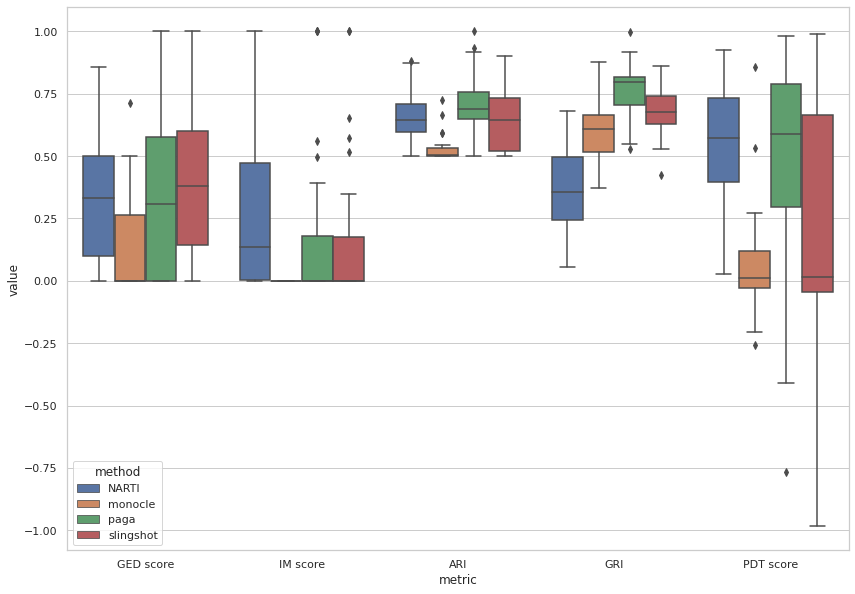

In [18]:

sns.boxplot(data=tidy, y='value', x='metric', hue='method', hue_order=hue_order)
plt.savefig(f'{thesis_dir}/MetricBreakdown.png')

In [13]:
print(f'{thesis_dir}/MetricBreakdown.png')

/home/sam/thesis/report/figures/MetricBreakdown.png


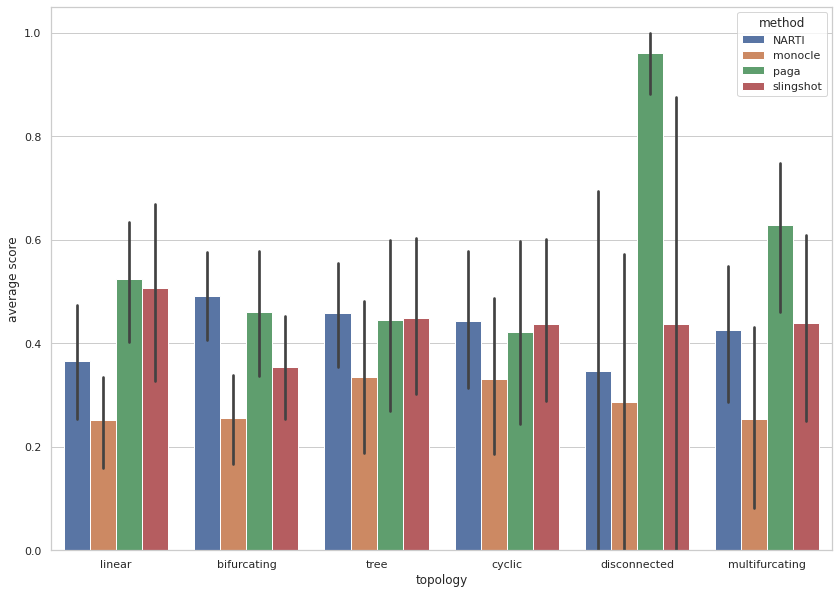

In [19]:
sns.barplot(data=tidy, y='value', x='topology', hue='method', hue_order=hue_order)
plt.ylabel('average score')
plt.savefig(f'{thesis_dir}/TopologyBreakdown.png')